In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

D:\Python37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
D:\Python37\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
D:\Python37\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


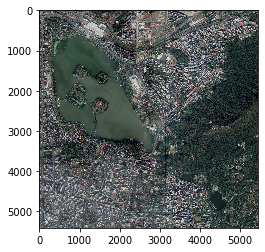

In [17]:
#读取路径
path=r"E:\project\images\researchImage\images\origin"
imgList=os.listdir(path)

#读第一幅
img=cv2.imread(os.path.join(path,imgList[6]))
plt.imshow(img)

In [18]:
cutpath=r"E:\project\images\researchImage\images\cut\18"
rows,cols,_=img.shape
M=256
for i in range(rows//M):
    for j in range(cols//M):
        tmp=img[i*M:(i+1)*M,j*M:(j+1)*M,:]
        cv2.imwrite(os.path.join(cutpath,str(i)+'_'+str(j)+'.tif'),tmp)

In [28]:
from sklearn.cluster import KMeans 

In [32]:
def miniKmeans(year,area,n=3):
    img=cv2.imread(r"E:\project\images\researchImage\images\cut\\"+year+"\\"+area+".tif")
    imgre=np.reshape(img,(-1,3))
    estimator = KMeans(n_clusters=3)#构造聚类器
    estimator.fit(imgre)#聚类
    label_pred = estimator.labels_ #获取聚类标签
    centroids = estimator.cluster_centers_ #获取聚类中心
    inertia = estimator.inertia_ # 获取聚类准则的总和
    pred=np.reshape(label_pred,(256,256))
    plt.subplot(121)
    plt.imshow(pred)
    plt.subplot(122)
    plt.imshow(img)
    return centroids

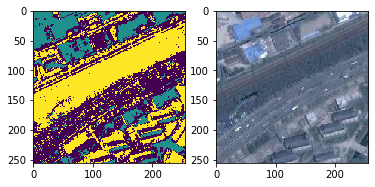

In [33]:
# 07
cen070311=miniKmeans('07','3_11',3)

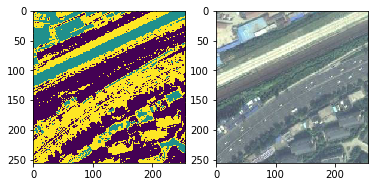

In [34]:
# 10
cen100311=miniKmeans('10','3_11',3)

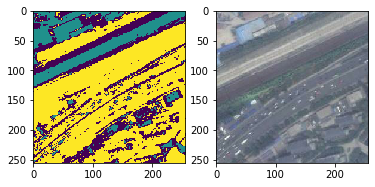

In [37]:
# 11
cen110311=miniKmeans('11','3_11',3)

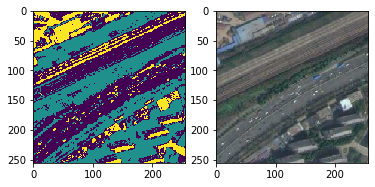

In [38]:
# 13
cen130311=miniKmeans('13','3_11',3)

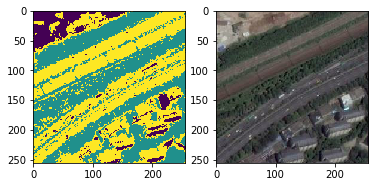

In [39]:
# 15
cen150311=miniKmeans('15','3_11',3)

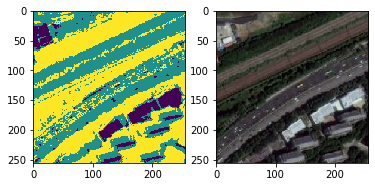

In [40]:
# 17
cen170311=miniKmeans('17','3_11',3)

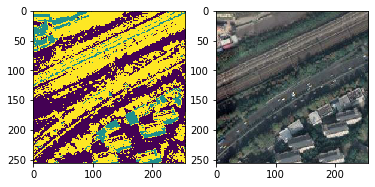

In [41]:
# 18
cen180311=miniKmeans('18','3_11',3)

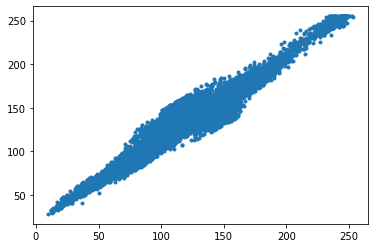

In [3]:
img=cv2.imread(r"E:\project\images\researchImage\images\cut\07\3_11.tif")
imgre=np.reshape(img,(-1,3))
x=imgre[:,0].T
y=imgre[:,1].T
z=imgre[:,2].T
plt.scatter(x,y,marker='.')

In [1]:
import os
import cv2
import numpy as np
def genlabelimg(path,a1,a2,a3,a4):
    dir,name=os.path.split(path)
    data=np.loadtxt(open(path,'r'),delimiter=',',skiprows=21,dtype=np.uint8)
    loc=data[:,:2]
    label=np.zeros((256,256),dtype=np.uint8)
    for i in range(loc.shape[0]):
        if i<a1:
            label[loc[i,1],loc[i,0]]=1
        elif i<a1+a2:
            label[loc[i,1],loc[i,0]]=2
        elif i<a1+a2+a3:
            label[loc[i,1],loc[i,0]]=3
        elif i<a1+a2+a3+a4:
            label[loc[i,1],loc[i,0]]=4
    cv2.imwrite(dir+"\\"+name.split('.')[0]+'.tif',label)
    cv2.imwrite(dir+"\\visual\\"+name.split('.')[0]+'.tif',label*50)
    return True

In [2]:
path=r'E:\project\images\researchImage\images\cut\label\17_12_11.csv'
genlabelimg(path,12746,26911,1086,10861)

True